# Modeling recruitment time series from 'astsa' package as an AR process

In [1]:
install.packages("astsa")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
require(astsa)

Loading required package: astsa



##### recruitment 데이터

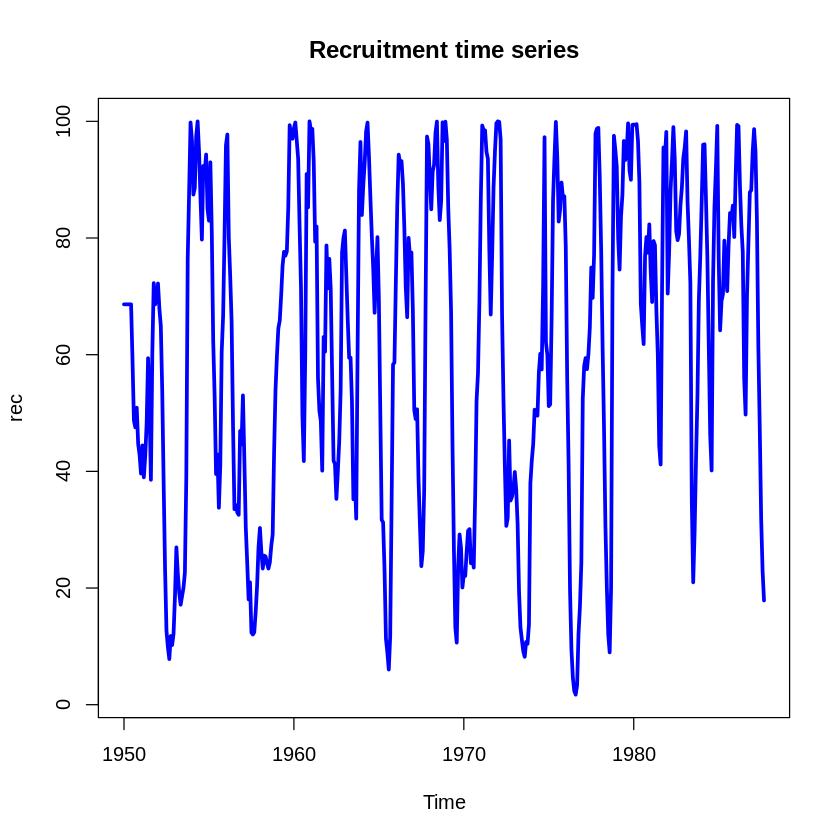

In [3]:
my.data=rec

# Plot rec 
plot(rec, main='Recruitment time series', col='blue', lwd=3)

##### Yule-Walker Equation을 이용하기 위해서는 $\mu=0$여야 함.
=> 관측치에서 평균을 빼서 평균이 0인 시계열 데이터 만들기 

In [4]:
ar.process=my.data-mean(my.data)

##### ACF, PACF

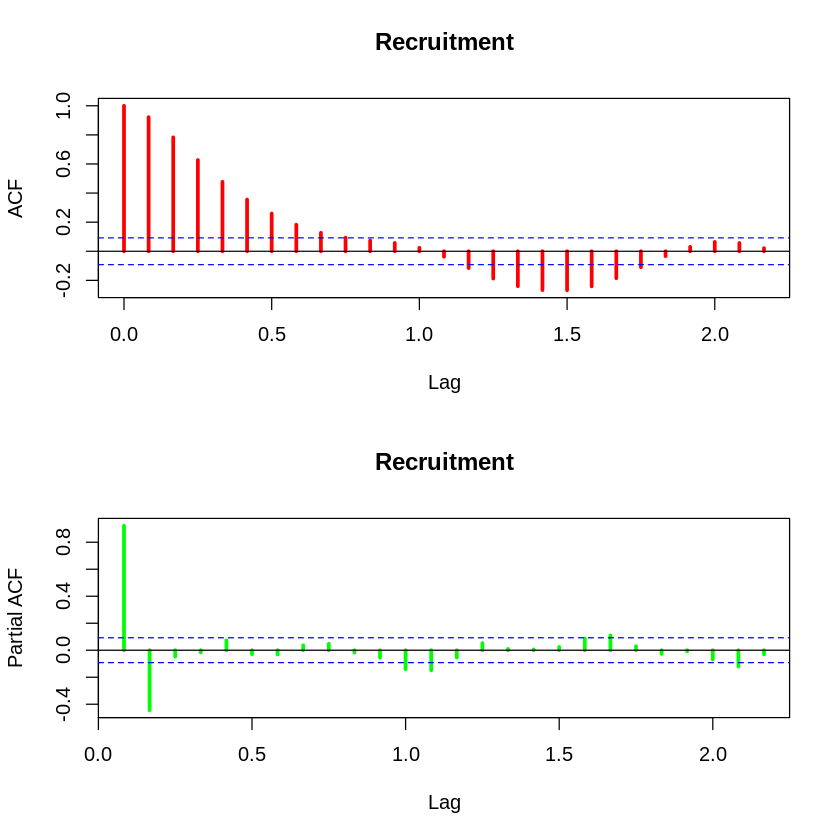

In [5]:
par(mfrow=c(2,1))
acf(ar.process, main='Recruitment', col='red', lwd=3)
pacf(ar.process, main='Recruitment', col='green', lwd=3)

=> p=2

##### sample autocorrelation function(r) 구하기 

In [6]:
p=2

r=NULL
r[1:p]=acf(ar.process, plot=F)$acf[2:(p+1)]
cat('r=',r,'\n')

r= 0.9218042 0.7829182 


##### R행렬

In [7]:
R=matrix(1,p,p) # 모든 원소가 1인 pxp 행렬 

# 대각성분 외의 원소 입력
for(i in 1:p){
	for(j in 1:p){
		if(i!=j) # 대각성분이 아니면,
			R[i,j]=r[abs(i-j)] # r 입력
		}
	}
R

1.0000000,0.9218042
0.9218042,1.0000000


##### b 열벡터

In [8]:
b=NULL
b=matrix(r,p,1)
b

0.9218042
0.7829182


##### b=Rx에서 x 구하기

In [9]:
phi.hat=NULL
phi.hat=solve(R,b)[,1]
phi.hat

[1]  1.3315874 -0.4445447

##### Yule-Walker Estimator 이용한 $\sigma_z^2$ 추정

In [10]:
c0=acf(ar.process, type='covariance', plot=F)$acf[1]
c0

[1] 780.991

In [11]:
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 94.17131

##### 모델 상수항($\hat{\phi_0}$) 구하기 

In [12]:
phi0.hat=mean(my.data)*(1-sum(phi.hat))
phi0.hat

[1] 7.033036

##### 최종 모델 파라미터들

In [13]:
cat("Constant:", phi0.hat," Coeffcinets:", phi.hat, " and Variance:", var.hat, '\n')

Constant: 7.033036  Coeffcinets: 1.331587 -0.4445447  and Variance: 94.17131 


# Johnson & Johnson quarterly earnings per share

##### recruitment 데이터

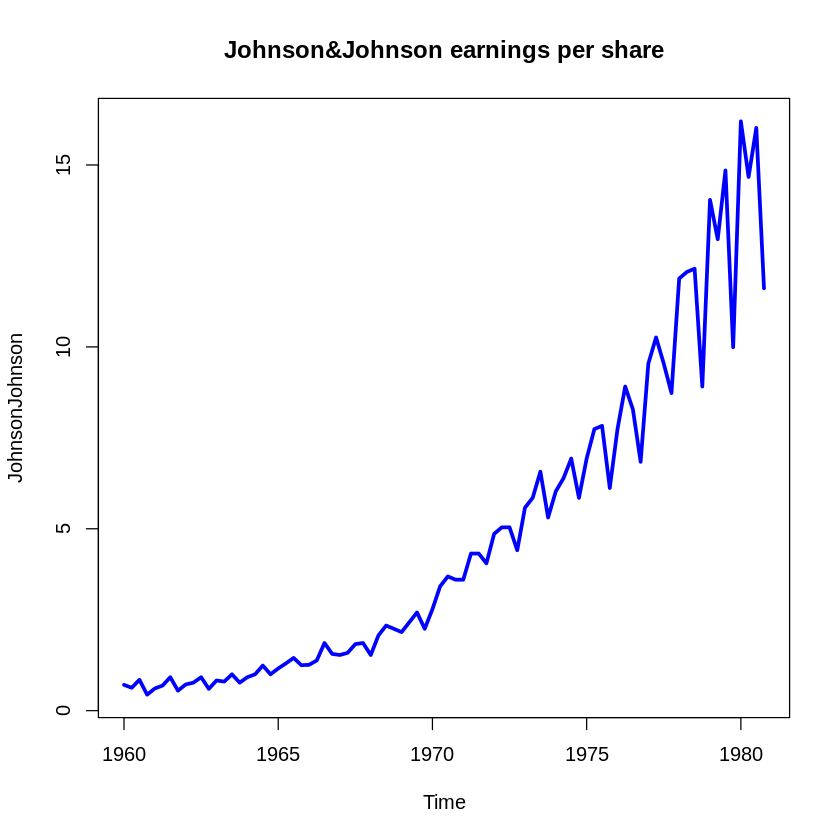

In [14]:
# Plot JJ 
plot(JohnsonJohnson, main='Johnson&Johnson earnings per share', col='blue', lwd=3)

=> non-stationary 데이터이므로 stationary하게 변형해줘야 함

##### stationary, $\mu=0$ 데이터로 변환
1. log-return of J&J
$$r_t=\text{log}(\frac{X_t}{X_{t-1}})=\text{log}(X_t)-\text{log}(X_{t-1})$$
  - In R, ```diff(log( ))```
2. 관측치에서 평균을 빼서 평균이 0인 시계열 데이터 만들기

In [16]:
jj.log.return=diff(log(JohnsonJohnson))
jj.log.return.mean.zero=jj.log.return-mean(jj.log.return)

##### ACF, PACF

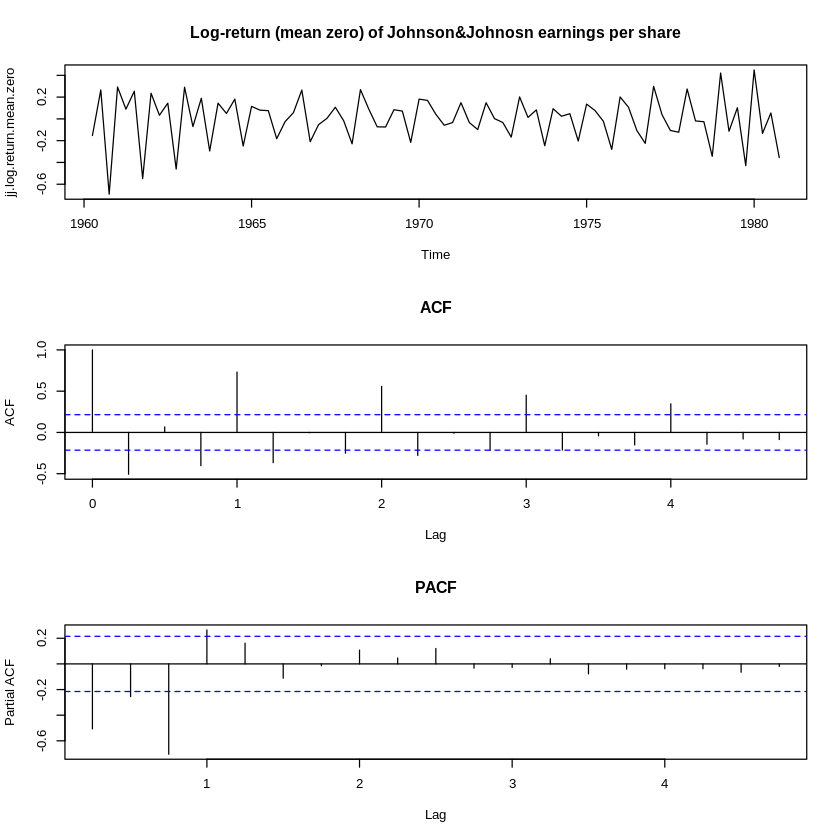

In [17]:
# Plots for log-returns
par(mfrow=c(3,1))
plot(jj.log.return.mean.zero, main='Log-return (mean zero) of Johnson&Johnosn earnings per share')
acf(jj.log.return.mean.zero, main='ACF')
pacf(jj.log.return.mean.zero, main='PACF')

=> p=4

##### sample autocorrelation function(r) 구하기 

In [21]:
p=4

r=NULL
r[1:p]=acf(jj.log.return.mean.zero, plot=F)$acf[2:(p+1)]
cat('r1=1', 'r2=',r[1], 'r3=',r[2], 'r4=',r[3], 'r5=',r[4])

r1=1 r2= -0.5068176 r3= 0.06710084 r4= -0.402836 r5= 0.7314478

##### R행렬

In [22]:
R=matrix(1,p,p) # 모든 원소가 1인 pxp 행렬 

# 대각성분 외의 원소 입력
for(i in 1:p){
	for(j in 1:p){
		if(i!=j) # 대각성분이 아니면,
			R[i,j]=r[abs(i-j)] # r 입력
		}
	}
R

1.00000000,-0.50681760,0.06710084,-0.40283604
-0.50681760,1.00000000,-0.50681760,0.06710084
0.06710084,-0.50681760,1.00000000,-0.50681760
-0.40283604,0.06710084,-0.50681760,1.00000000


##### b 열벡터

In [23]:
b=NULL
b=matrix(r,p,1)
b

-0.50681760
0.06710084
-0.40283604
0.73144780


##### b=Rx에서 x 구하기

In [24]:
phi.hat=NULL
phi.hat=solve(R,b)[,1]
phi.hat

[1] -0.6293492 -0.5171526 -0.4883374  0.2651266

##### Yule-Walker Estimator 이용한 $\sigma_z^2$ 추정

In [25]:
c0=acf(jj.log.return.mean.zero, type='covariance', plot=F)$acf[1]
c0

[1] 0.04365692

In [26]:
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 0.01419242

##### 모델 상수항($\hat{\phi_0}$) 구하기 

In [27]:
phi0.hat=mean(jj.log.return)*(1-sum(phi.hat))
phi0.hat

[1] 0.079781

##### 최종 모델 파라미터들

In [28]:
cat("Constant:", phi0.hat," Coeffcinets:", phi.hat, " and Variance:", var.hat, '\n')

Constant: 0.079781  Coeffcinets: -0.6293492 -0.5171526 -0.4883374 0.2651266  and Variance: 0.01419242 
